# <font color = 'orange'> 1. Introduction </font>


### 1.1 Importer les libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datetime import date

import statsmodels.api as sm
#import statsmodels.apia
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf

import scipy.stats as st
from scipy.stats import f_oneway, ttest_ind, norm, entropy, chi2_contingency, pearsonr

### 1.2 Importer le DataFrame

In [2]:
df = pd.read_csv('df_export.csv')

# <font color = 'orange'> 2. Aperçu & Transformation </font>


In [3]:
df.head()

,id_prod,date,session_id,client_id,sex,birth,price,categ,Age,cat_age,day,month,year,week_day
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,4.99,0.0,44,40_50,10,4,2021,5
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,65.75,2.0,21,20_30,3,2,2022,3
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,10.71,1.0,42,40_50,23,9,2021,3
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,4.20,0.0,58,50_60,17,10,2021,6
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,8.99,0.0,41,40_50,17,7,2021,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336816 entries, 0 to 336815
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     336816 non-null  object 
 1   date        336816 non-null  object 
 2   session_id  336816 non-null  object 
 3   client_id   336816 non-null  object 
 4   sex         336816 non-null  object 
 5   birth       336816 non-null  int64  
 6   price       336816 non-null  float64
 7   categ       336816 non-null  float64
 8   Age         336816 non-null  int64  
 9   cat_age     336816 non-null  object 
 10  day         336816 non-null  int64  
 11  month       336816 non-null  int64  
 12  year        336816 non-null  int64  
 13  week_day    336816 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 36.0+ MB


In [5]:
df.duplicated().any()

False

In [6]:
df.describe(include='object')

,id_prod,date,session_id,client_id,sex,cat_age
count,336816,336816,336816,336816,336816,336816
unique,3265,336816,169194,8600,2,8
top,1_369,2021-04-10 18:37:28.723910,s_118668,c_1609,m,40_50
freq,1081,1,14,12855,169241,111503


In [7]:
client_nombre_total = df.client_id.value_counts()
client_nombre_total.head(5)

c_1609    12855
c_6714     4473
c_3454     3275
c_4958     2562
c_2140      195
Name: client_id, dtype: int64

In [8]:
client_nombre_total.describe()

count     8600.000000
mean        39.164651
std        156.448296
min          1.000000
25%         14.000000
50%         25.000000
75%         47.000000
max      12855.000000
Name: client_id, dtype: float64

Text(0.5, 1.0, 'Tous les Clients')

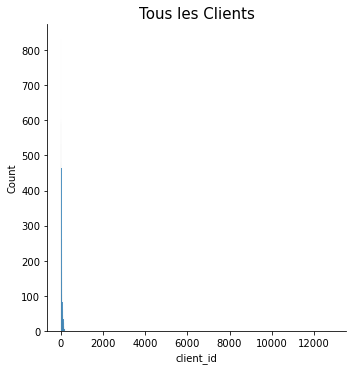

In [9]:
# Clients + B TO B (business to business)
sns.displot(client_nombre_total)
plt.title('Tous les Clients', size=15)

<AxesSubplot:>

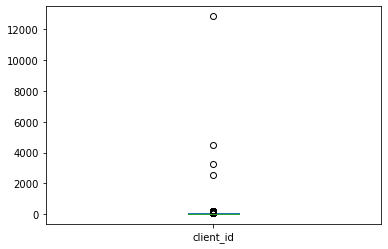

In [10]:
client_nombre_total.plot(kind='box')

In [11]:
# Supprimer les business tô business
b_t_b = client_nombre_total.iloc[0:4].index
df = df[~df['client_id'].isin(b_t_b)]

In [12]:
df.client_id.value_counts().describe()

count    8596.000000
mean       36.488018
std        33.539110
min         1.000000
25%        14.000000
50%        25.000000
75%        47.000000
max       195.000000
Name: client_id, dtype: float64

In [13]:
df[['price', 'Age']].describe()

,price,Age
count,313651.000000,313651.000000
mean,17.100733,43.206567
std,17.594521,13.797003
min,0.620000,17.000000
25%,8.580000,34.000000
50%,13.820000,42.000000
75%,18.990000,50.000000
max,300.000000,92.000000


In [14]:
df.nunique()

id_prod         3262
date          313651
session_id    157808
client_id       8596
sex                2
birth             76
price           1440
categ              3
Age               76
cat_age            8
day               31
month             12
year               2
week_day           7
dtype: int64

In [15]:
df.isna().any()

id_prod       False
date          False
session_id    False
client_id     False
sex           False
birth         False
price         False
categ         False
Age           False
cat_age       False
day           False
month         False
year          False
week_day      False
dtype: bool

In [16]:
df.isnull().any()

id_prod       False
date          False
session_id    False
client_id     False
sex           False
birth         False
price         False
categ         False
Age           False
cat_age       False
day           False
month         False
year          False
week_day      False
dtype: bool

<AxesSubplot:>

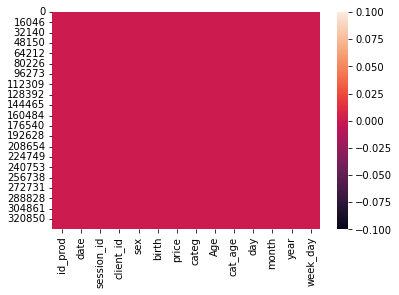

In [17]:
sns.heatmap(df.isna())

In [18]:
# object to datatime
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313651 entries, 0 to 336814
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     313651 non-null  object        
 1   date        313651 non-null  datetime64[ns]
 2   session_id  313651 non-null  object        
 3   client_id   313651 non-null  object        
 4   sex         313651 non-null  object        
 5   birth       313651 non-null  int64         
 6   price       313651 non-null  float64       
 7   categ       313651 non-null  float64       
 8   Age         313651 non-null  int64         
 9   cat_age     313651 non-null  object        
 10  day         313651 non-null  int64         
 11  month       313651 non-null  int64         
 12  year        313651 non-null  int64         
 13  week_day    313651 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(5)
memory usage: 35.9+ MB


# <font color = 'orange'> 3. Visualisation  </font>


##  <font color = 'blue'> 3.1 Analyse univariée  </font>


###   <font color = 'green'> 3.1.1 Age  </font>

In [19]:
df.Age.describe()

count    313651.000000
mean         43.206567
std          13.797003
min          17.000000
25%          34.000000
50%          42.000000
75%          50.000000
max          92.000000
Name: Age, dtype: float64

In [20]:
age_val = df.cat_age.value_counts()
age_val

40_50     98648
30_40     97777
50_60     39533
60_70     26081
20_30     24614
0_20      11754
70_80     10593
80_100     4651
Name: cat_age, dtype: int64

In [21]:
age_val.values

array([98648, 97777, 39533, 26081, 24614, 11754, 10593,  4651],
      dtype=int64)

In [22]:
sns.set_style('darkgrid')

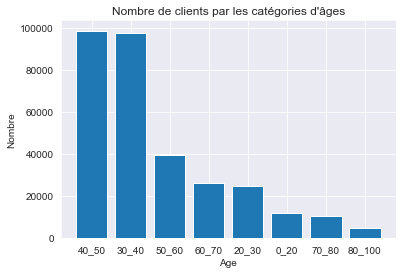

In [23]:
#plt.figure(figsize=(6,8))
plt.bar(age_val.index, age_val.values)
plt.xticks(['40_50', '30_40', '50_60', '20_30', '60_70', '0_20', '70_80', '80_100'])
#plt.yticks([111461,  97738,  47271,  27174,  26077, 11753 ,  10591,   4648])
plt.title("Nombre de clients par les catégories d'âges")
plt.xlabel('Age')
plt.ylabel('Nombre')
plt.show()

In [24]:
age_val_norm = df.cat_age.value_counts(normalize=True)
age_val_norm

40_50     0.314515
30_40     0.311738
50_60     0.126041
60_70     0.083153
20_30     0.078476
0_20      0.037475
70_80     0.033773
80_100    0.014829
Name: cat_age, dtype: float64

📌Normalizer

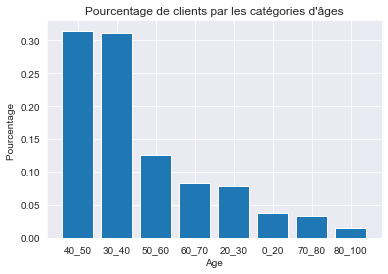

In [25]:
plt.bar(age_val_norm.index, age_val_norm.values)
plt.xticks(['40_50', '30_40', '50_60', '20_30', '60_70', '0_20', '70_80', '80_100'])
plt.title("Pourcentage de clients par les catégories d'âges")
plt.xlabel('Age')
plt.ylabel('Pourcentage ')
plt.show()

Text(0.5, 1.0, "Distribution d'âge")

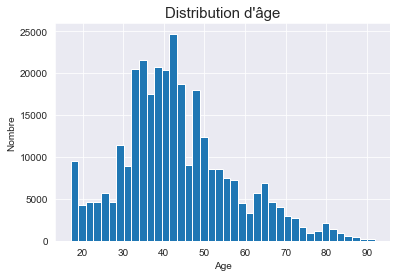

In [26]:
#Age distribution
#sns.displot(x='Age', data = df, bins=40 )

df.Age.hist(bins=40)
plt.xlabel('Age')
plt.ylabel('Nombre')
plt.title("Distribution d'âge", size=15)


In [27]:
print('mode =>',df.Age.mode())
df.Age.describe()

mode => 0    42
dtype: int64


count    313651.000000
mean         43.206567
std          13.797003
min          17.000000
25%          34.000000
50%          42.000000
75%          50.000000
max          92.000000
Name: Age, dtype: float64

Text(0.5, 1.0, "Distribution d'âge")

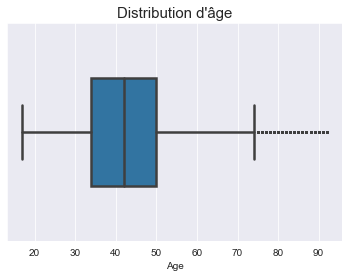

In [28]:
sns.boxplot(x='Age', data = df ,width=0.5, linewidth=2.5, fliersize=1)
plt.title("Distribution d'âge", size=15)

In [29]:
# 25% 50% 75%
np.percentile(df.Age,[25,50,75])

array([34., 42., 50.])

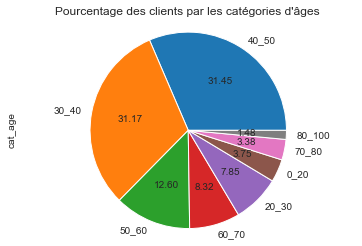

In [30]:
# Diagramme en secteurs
df["cat_age"].value_counts(normalize=True).plot(kind='pie', autopct='%.2f')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.title("Pourcentage des clients par les catégories d'âges")

plt.axis('equal') 
#plt.legend(loc=3)

plt.show() # Affiche le graphique

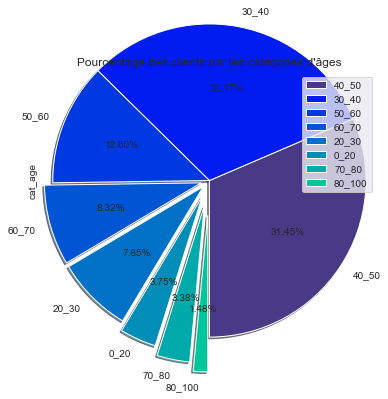

In [31]:
counts = df['cat_age'].value_counts()
plt.axis('equal')
explode = (0, 0, 0,0.1,0.1,0.2,0.3,0.4)
colors = ['#483a87','#001CF0','#0038E2','#0055D4','#0071C6','#008DB8','#00AAAA','#00C69C','#00E28E','#00FF80',]
counts.plot(kind='pie', fontsize=10,colors=colors,explode=explode,autopct = "%0.2f%%", 
            shadow = True, # Showing shadow of pie chart
        radius = 1.8, # Radius to increase or decrease the size of pie chart 
       startangle = 270, # Start angle of first section
        ) 
plt.title("Pourcentage des clients par les catégories d'âges")

plt.legend(loc='best')

plt.show()

###   <font color = 'green'> 3.1.2 Sex  </font>

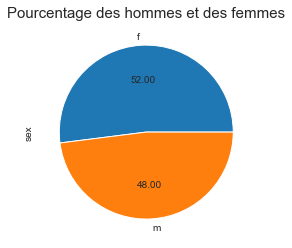

In [32]:
df.sex.value_counts(normalize=True).plot(kind='pie', autopct='%.2f')

plt.title("Pourcentage des hommes et des femmes", size=15)
plt.show()

###   <font color = 'green'> 3.1.3 Catégorie de produits  </font>

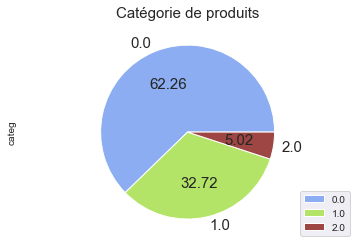

In [33]:
counts_3 = df['categ'].value_counts()
plt.axis('equal')
colors = ['#8cadf2','#b4e467','#9d4643']
counts_3.plot(kind='pie', fontsize=15,colors=colors, autopct='%.2f')
plt.legend(loc=4)
plt.title('Catégorie de produits', size=15)

plt.show()

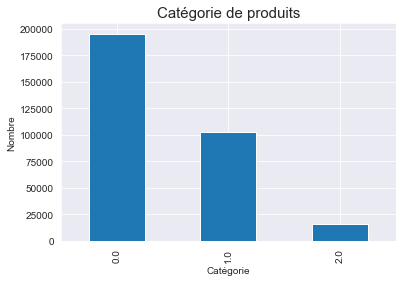

In [34]:
#plt.xkcd()
df.categ.value_counts().plot(kind='bar')
plt.xlabel('Catégorie')
plt.ylabel('Nombre')
plt.title('Catégorie de produits', size=15)

plt.show()

📌Catégorie de produits normalizer

In [35]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [36]:
#plt.style.use('fivethirtyeight')

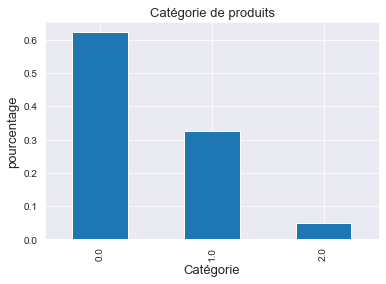

In [37]:
#plt.style.use('fivethirtyeight')
df.categ.value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Catégorie', size=13)
plt.ylabel('pourcentage', size=13)
plt.title('Catégorie de produits', size=13)
plt.show()

###   <font color = 'green'> 3.1.4 Client  </font>

📌nombre d'article acheté par client

<AxesSubplot:title={'center':"Le nombre d'achats par client(sans BtoB)"}, xlabel='Client_id', ylabel='prix'>

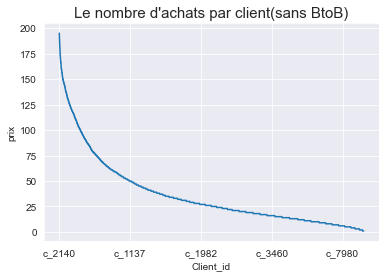

In [38]:
values_clients = df.client_id.value_counts()

plt.xlabel('Client_id')
plt.ylabel('prix')
plt.title("Le nombre d'achats par client(sans BtoB)", size=15)

values_clients.plot()

In [39]:
values_clients

c_2140    195
c_7959    195
c_8026    193
c_2595    193
c_3725    190
         ... 
c_4851      1
c_7739      1
c_3923      1
c_240       1
c_8005      1
Name: client_id, Length: 8596, dtype: int64

Text(0.5, 1.0, "Le nombre d'achats par client(sans BtoB)")

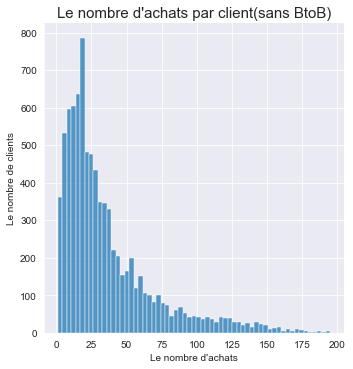

In [40]:
#plt.hist(values_clients)
sns.displot(values_clients)

plt.xlabel("Le nombre d'achats")
plt.ylabel("Le nombre de clients")
plt.title("Le nombre d'achats par client(sans BtoB)", size=15)

In [41]:
print('Le Mode =>',values_clients.mode())
print('Le median =>',values_clients.median())
print('La skewness empririque =>',values_clients.skew())
print('La kurtosis empririque =>',values_clients.kurtosis())

Le Mode => 0    13
dtype: int64
Le median => 25.0
La skewness empririque => 1.7605824841500881
La kurtosis empririque => 3.0789356414210682


In [42]:
values_clients.describe()

count    8596.000000
mean       36.488018
std        33.539110
min         1.000000
25%        14.000000
50%        25.000000
75%        47.000000
max       195.000000
Name: client_id, dtype: float64

In [43]:
client_nombre_achat = df.groupby('client_id')['price'].count().sort_values(ascending = False)


C:\Users\pouri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, "Nombre d'Achat par clients(sans BtoB)")

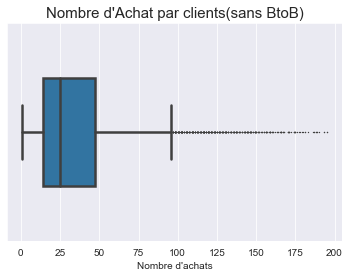

In [44]:
sns.boxplot(client_nombre_achat,width=0.5, linewidth=2.5, fliersize=0.5)

plt.xlabel("Nombre d'achats")
plt.title("Nombre d'Achat par clients(sans BtoB)", size=15)

📌somme totale payée par client

In [45]:
client_price_total = df.groupby('client_id')['price'].sum().sort_values(ascending = False)
client_price_total

client_id
c_7959    2564.25
c_8026    2547.66
c_4491    2540.53
c_2140    2527.01
c_8392    2515.98
           ...   
c_8351       6.31
c_890        6.08
c_1675       5.57
c_8114       4.99
c_8140       4.15
Name: price, Length: 8596, dtype: float64

In [46]:
client_price_total.describe()

count    8596.000000
mean      623.971844
std       457.131506
min         4.150000
25%       275.632500
50%       501.170000
75%       869.897500
max      2564.250000
Name: price, dtype: float64

C:\Users\pouri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, "La somme d'Achat par clients(sans BtoB)")

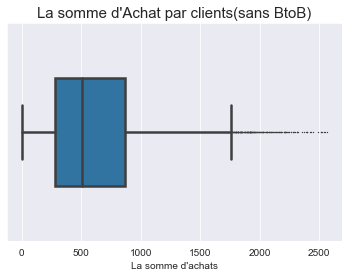

In [47]:
sns.boxplot(client_price_total,width=0.5, linewidth=2.5, fliersize=0.5)

plt.xlabel("La somme d'achats")
plt.title("La somme d'Achat par clients(sans BtoB)", size=15)

###   <font color = 'green'> 3.1.5 Sessions   </font>


In [48]:
sess_val = df.session_id.value_counts()
sess_val

s_118668    14
s_96857     13
s_21005     13
s_93892     12
s_168560    12
            ..
s_66307      1
s_97435      1
s_43503      1
s_170529     1
s_112349     1
Name: session_id, Length: 157808, dtype: int64

In [49]:
sess_val.describe()

count    157808.000000
mean          1.987548
std           1.272775
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          14.000000
Name: session_id, dtype: float64

C:\Users\pouri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='session_id'>

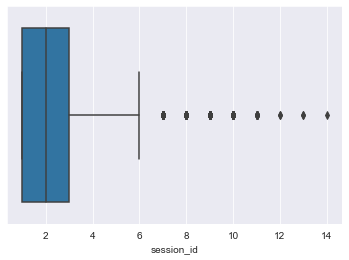

In [50]:
sns.boxplot(sess_val)

###   <font color = 'green'> 3.1.6 Prix   </font>

In [51]:
df.price.describe()

count    313651.000000
mean         17.100733
std          17.594521
min           0.620000
25%           8.580000
50%          13.820000
75%          18.990000
max         300.000000
Name: price, dtype: float64

C:\Users\pouri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution de prix')

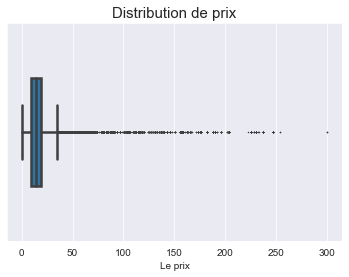

In [52]:
#df.boxplot(column="price", vert=False)

sns.boxplot(df.price,width=0.5, linewidth=2.5, fliersize=0.5)

plt.xlabel("Le prix")
plt.title("Distribution de prix", size=15)

C:\Users\pouri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution de prix(inférieur à 50)')

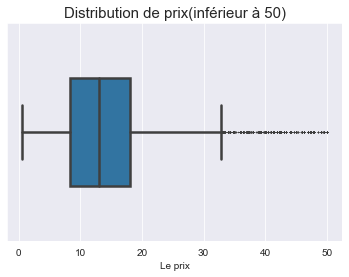

In [53]:
mini =  df[df.price.abs() < 50]
sns.boxplot(mini.price,width=0.5, linewidth=2.5, fliersize=0.5)

plt.xlabel("Le prix")
plt.title("Distribution de prix(inférieur à 50)", size=15)

Text(0.5, 1.0, 'Distribution de prix')

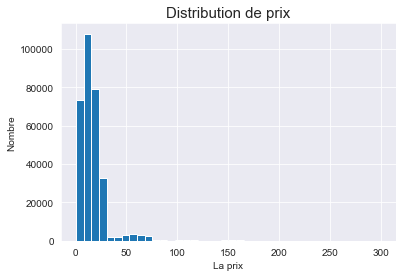

In [54]:
# Histogramme
df["price"].hist(bins=40)
plt.xlabel('La prix')
plt.ylabel('Nombre')
plt.title('Distribution de prix', size=15)

Text(0.5, 1.0, 'Distribution de prix')

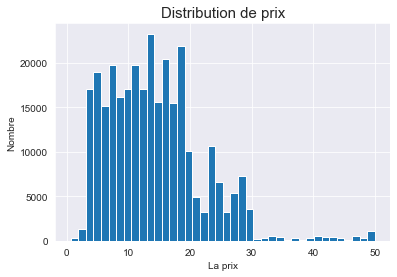

In [55]:
# Supprimer les prix au dessus d 100 
df[df.price < 50]["price"].hist(bins=40)
plt.xlabel('La prix')
plt.ylabel('Nombre')
plt.title('Distribution de prix', size=15)

Text(0.5, 1.0, 'Variation de prix')

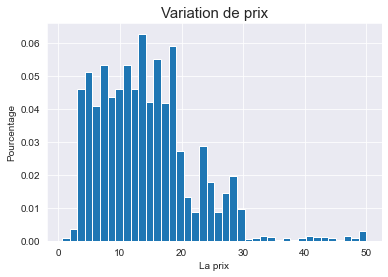

In [56]:
# Supprimer les prix au dessus d 100 en pourgentage
df[df.price < 50]["price"].hist(density=True,bins=40)
plt.xlabel('La prix')
plt.ylabel('Pourcentage')
plt.title('Variation de prix', size=15)

In [57]:
print('La skewness empririque =>',df['price'].skew())
print('La kurtosis empririque =>',df['price'].kurtosis())

La skewness empririque => 5.541810390669624
La kurtosis empririque => 46.668396931489156


📌pour le DataFrame modifié(inférieur à 50)

In [58]:
print('La skewness empririque =>',mini['price'].skew())
print('La kurtosis empririque =>',mini['price'].kurtosis())

La skewness empririque => 1.1411978980241382
La kurtosis empririque => 2.30886255611908


###   <font color = 'green'> 3.1.7 La fréquence d’achat   </font>
 

In [59]:
month_CA = df.groupby('month')['price'].sum()
month_NB = df.groupby('month')['price'].count()

([<matplotlib.axis.XTick at 0x25953880190>,
 [Text(2, 0, 'M2'),
  Text(4, 0, 'M4'),
  Text(6, 0, 'M6'),
  Text(8, 0, 'M8'),
  Text(10, 0, 'M10')])

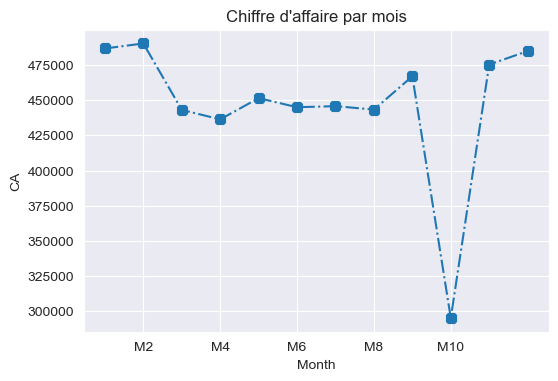

In [60]:
plt.figure(figsize=(6,4), dpi=100) #dpi = resolution
plt.plot(month_CA, ls='-.', marker='+', mew=8)

plt.title("Chiffre d'affaire par mois")
plt.xlabel('Month')
plt.ylabel('CA')
plt.xticks([2,4,6,8,10],['M2','M4','M6','M8','M10']) #changer les noms de X

([<matplotlib.axis.XTick at 0x259537f5580>,
 [Text(2, 0, 'M2'),
  Text(4, 0, 'M4'),
  Text(6, 0, 'M6'),
  Text(8, 0, 'M8'),
  Text(10, 0, 'M10')])

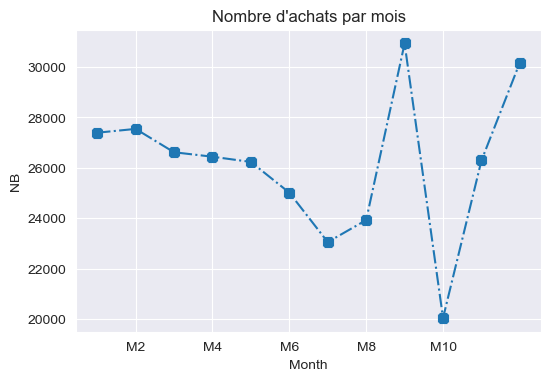

In [61]:
plt.figure(figsize=(6,4), dpi=100) #dpi = resolution
plt.plot(month_NB, ls='-.', marker='+', mew=8)

plt.title("Nombre d'achats par mois")
plt.xlabel('Month')
plt.ylabel('NB')
plt.xticks([2,4,6,8,10],['M2','M4','M6','M8','M10']) #changer les noms de X

Nombre et somme de categorie achetes par age

In [62]:
pan_moyenne_count = df.groupby('cat_age')['price'].count()
pan_moyenne_sum = df.groupby('cat_age')['price'].sum()

Text(0, 0.5, "Nombre d'achat")

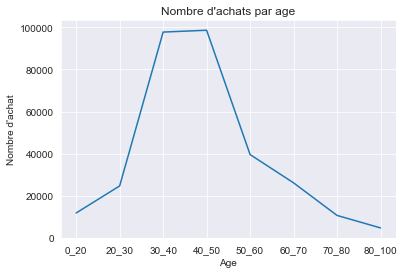

In [63]:
plt.plot(pan_moyenne_count)


plt.title("Nombre d'achats par age")
plt.xlabel('Age')
plt.ylabel("Nombre d'achat")

Text(0, 0.5, "Somme d'achat")

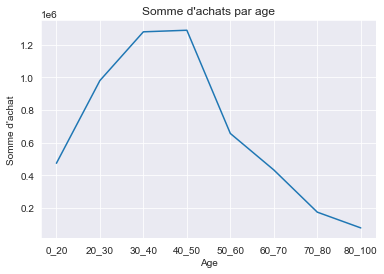

In [64]:
plt.plot(pan_moyenne_sum)

plt.title("Somme d'achats par age")
plt.xlabel('Age')
plt.ylabel("Somme d'achat")

##  <font color = 'blue'> 3.2 analyse bivariée  </font>

###   <font color = 'green'> 3.2.1 Corrélation entre les valeurs  </font>

In [65]:
df.corr()

,birth,price,categ,Age,day,month,year,week_day
birth,1.000000,0.199018,0.083128,-1.000000,0.001712,-0.004068,-0.008348,-0.001369
price,0.199018,1.000000,0.670687,-0.199018,0.001323,-0.021520,0.017848,-0.000222
categ,0.083128,0.670687,1.000000,-0.083128,0.002841,-0.034787,0.053510,0.000859
Age,-1.000000,-0.199018,-0.083128,1.000000,-0.001712,0.004068,0.008348,0.001369
day,0.001712,0.001323,0.002841,-0.001712,1.000000,0.032495,-0.033513,0.002544
month,-0.004068,-0.021520,-0.034787,0.004068,0.032495,1.000000,-0.651617,-0.001086
year,-0.008348,0.017848,0.053510,0.008348,-0.033513,-0.651617,1.000000,0.010660
week_day,-0.001369,-0.000222,0.000859,0.001369,0.002544,-0.001086,0.010660,1.000000


<AxesSubplot:>

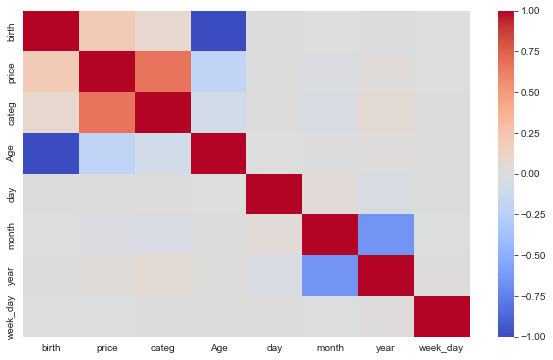

In [66]:
# voir les correlation
plt.figure(figsize =(10,6))
sns.heatmap(df.corr(),cmap = 'coolwarm') # cmap = 'RdBu'

###   <font color = 'green'> 3.2.2 Une analyse de concentration, via une courbe de Lorenz et un indice de Gini   </font>

In [67]:
concentration_ventes = df[['client_id', 'price']].groupby('client_id').agg({
    'price': ['count', 'sum']
}).reset_index()
concentration_ventes.columns = ['p_id', 't_number', 'ca']

Text(0.5, 1.0, 'Volume des ventes')

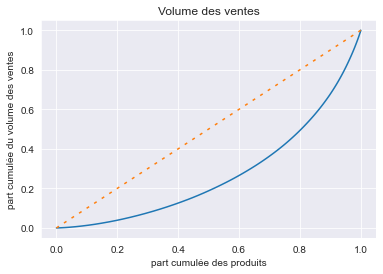

In [68]:
t_number = concentration_ventes['t_number'].values
lorenz = np.cumsum(np.sort(t_number)) / t_number.sum()
lorenz = np.append([0], lorenz)

plt.plot(np.linspace(0,1,len(lorenz)), lorenz, drawstyle='steps-post')
plt.plot(np.linspace(0,1,len(lorenz)), np.linspace(0,1,len(lorenz)), dashes=[2,4])
plt.xlabel('part cumulée des produits')
plt.ylabel('part cumulée du volume des ventes')
plt.title('Volume des ventes')

In [69]:
aire_ss_courbe = lorenz[:-1].sum() / len(lorenz)
S = 0.5 - aire_ss_courbe
gini = 2*S
print(f'indice de gini: {gini:.2f}')

indice de gini: 0.46


###   <font color = 'green'> 3.2.3 Par catégorie  </font>

Text(0.5, 1.0, 'Répartition des prix en fonction des catégories')

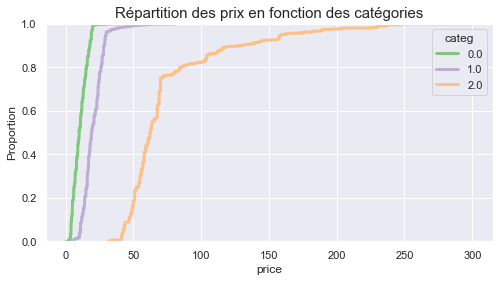

In [70]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(8,4)})

a =sns.ecdfplot(x='price',
             data=df,
             hue='categ',
             palette = 'Accent',
             lw=3,
            )
a.set_title('Répartition des prix en fonction des catégories', size=15)

In [71]:
df.groupby('categ').price.describe()

,count,mean,std,min,25%,50%,75%,max
categ,,,,,,,,
0.0,195270.0,10.644718,4.926922,0.62,6.30,9.99,14.45,40.99
1.0,102625.0,20.478298,7.571942,2.00,15.81,19.08,24.98,80.99
2.0,15756.0,75.113138,39.140493,30.99,53.99,62.54,69.99,300.00


Text(0.5, 1.0, 'Répartition des prix en fonction des catégories')

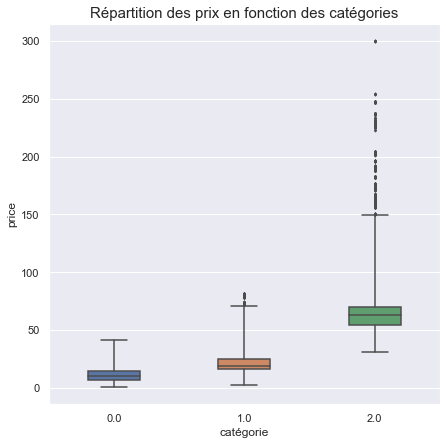

In [72]:
plt.figure(figsize=(7, 7)) #subplots ou figure
b =sns.boxplot(x='categ', y ='price', data=df,
            width=0.4,
            whis=5,
            fliersize=2
            )
b.set_xlabel('catégorie')
b.set_title('Répartition des prix en fonction des catégories', size=15)

In [73]:
df_CA= df.groupby('categ')['price'].sum()
df_CA

categ
0.0    2078594.02
1.0    2101585.34
2.0    1183482.61
Name: price, dtype: float64

Text(0.5, 1.0, "Chiffre d'affaire")

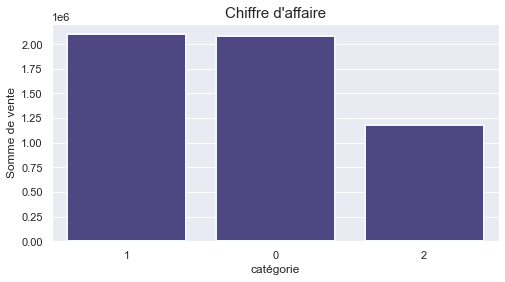

In [74]:
sns.set_style('darkgrid')
c =sns.barplot(x=df_CA.index, y=df_CA.values,
             color='darkslateblue',
             errcolor = 'white', 
             errwidth=8,
             edgecolor='aliceblue',
             lw=2,  #line width,
            order=[1, 0, 2]
           )

c.set_xlabel('catégorie')
c.set_ylabel('Somme de vente')
c.set_title("Chiffre d'affaire", size=15)


In [75]:
X = "categ" # qualitative
Y = "price" # quantitative

sous_echantillon = df[df["price"] < 300] # On ne garde que les dépenses

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.6431345411398897

un résultat proche de 0.6, ce qui laisse penser qu'il y a effectivement une corrélation entre le montant des dépenses et leur catégorie

###   <font color = 'green'> 3.2.4 Par sex  </font>

In [76]:
df_sex= df.groupby('sex')['price'].sum()
df_sex

sex
f    2786503.85
m    2577158.12
Name: price, dtype: float64

Text(0.5, 1.0, 'La Somme achetée par sex')

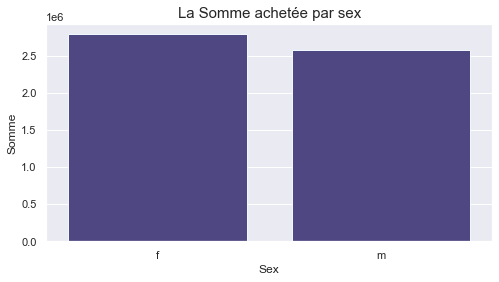

In [77]:
sns.set_style('darkgrid')
d =sns.barplot(x=df_sex.index, y=df_sex.values,
             color='darkslateblue',
             errcolor = 'white', 
             errwidth=4,
             edgecolor='aliceblue',
             lw=1,  #line width,
           )

d.set_xlabel('Sex')
d.set_ylabel('Somme')
d.set_title("La Somme achetée par sex", size=15)

Text(0.5, 1.0, 'La Somme achetée par sex')

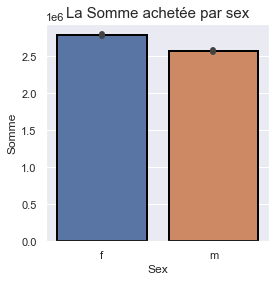

In [78]:
plt.figure(figsize=(4, 4))

sns.set_style('darkgrid')
e =sns.barplot(x='sex', y='price', data=df,
            errwidth=6,
            edgecolor='black',
            lw=2,  #line width
            estimator=np.sum
           )
e.set_xlabel('Sex')
e.set_ylabel('Somme')
e.set_title("La Somme achetée par sex", size=15)

In [79]:
X = "sex" # qualitative
Y = "price" # quantitative

eta_squared(df[X],df[Y])

9.307542661770359e-07

###   <font color = 'green'> 3.2.5 Vendre total par année et mois  </font>

Text(0.5, 1.0, 'La Somme achetée par année et mois')

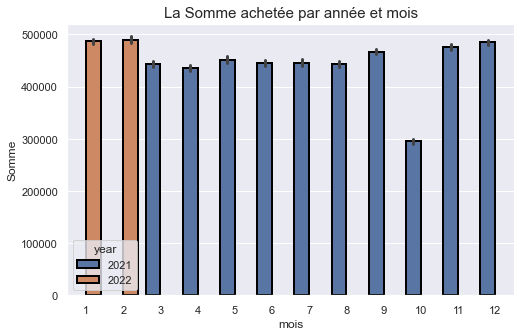

In [80]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(8,5)})
f = sns.barplot(x='month', y='price', data=df, hue='year',
            errwidth=3,
            edgecolor='black',
            lw=2,  #line width
            estimator=np.sum,          

           )

f.set_xlabel('mois')
f.set_ylabel('Somme')
f.set_title("La Somme achetée par année et mois", size=15)

###   <font color = 'green'> 3.2.6 Vendre total par catégorie et age  </font>

Text(0.5, 1.0, 'La Somme achetée par par catégorie et age')

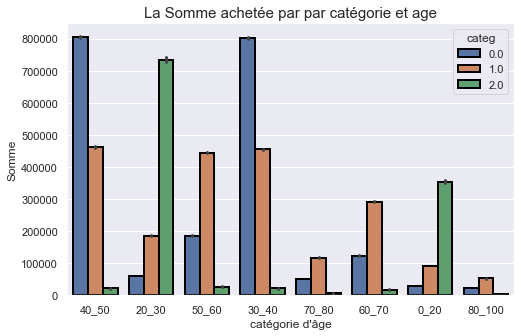

In [81]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(8,5)})
f = sns.barplot(x='cat_age', y='price', data=df, hue='categ',
            errwidth=3,
            edgecolor='black',
            lw=2,  #line width
            estimator=np.sum,         

           )
f.set_xlabel("catégorie d'âge")
f.set_ylabel('Somme')
f.set_title("La Somme achetée par par catégorie et age", size=15)

Text(0.5, 0, 'cat_age/categ')

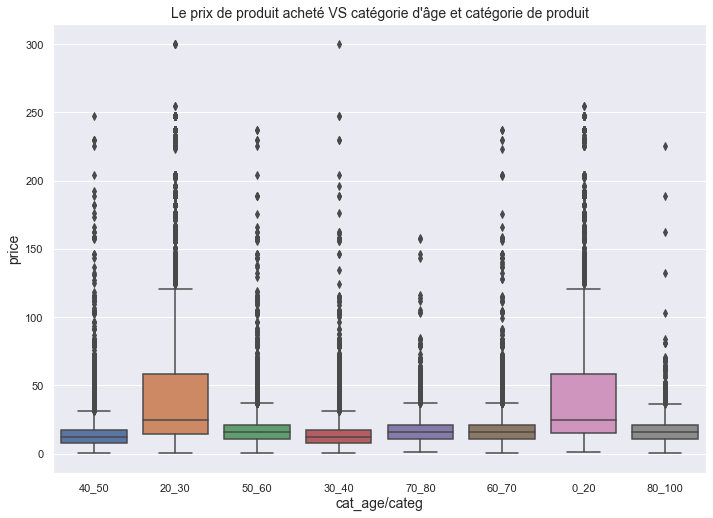

In [82]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data=df, x='cat_age', y='price',)

plt.title("Le prix de produit acheté VS catégorie d'âge et catégorie de produit", size=14) 
plt.ylabel("price", size=14)
plt.xlabel("cat_age/categ", size=14)

Text(0.5, 0, 'cat_age/categ')

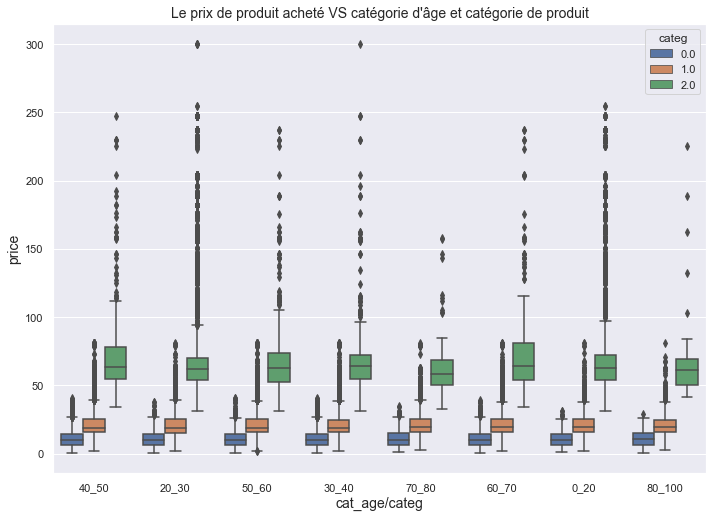

In [83]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data=df, x='cat_age', y='price', hue='categ')

plt.title("Le prix de produit acheté VS catégorie d'âge et catégorie de produit", size=14) 
plt.ylabel("price", size=14)
plt.xlabel("cat_age/categ", size=14)

In [84]:
def compute_new_catage (age):
    if age < 30:
        return '-30'
    if 30<=age<50:
        return '30_50'
    if age >= 50:
        return '50+'

In [85]:
df['new_cat_age'] = df.Age.apply(compute_new_catage) 

In [86]:
df.head()

,id_prod,date,session_id,client_id,sex,birth,price,categ,Age,cat_age,day,month,year,week_day,new_cat_age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,4.99,0.0,44,40_50,10,4,2021,5,30_50
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,65.75,2.0,21,20_30,3,2,2022,3,-30
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,10.71,1.0,42,40_50,23,9,2021,3,30_50
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,4.20,0.0,58,50_60,17,10,2021,6,50+
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,8.99,0.0,41,40_50,17,7,2021,5,30_50


Text(0.5, 0, 'cat_age/categ')

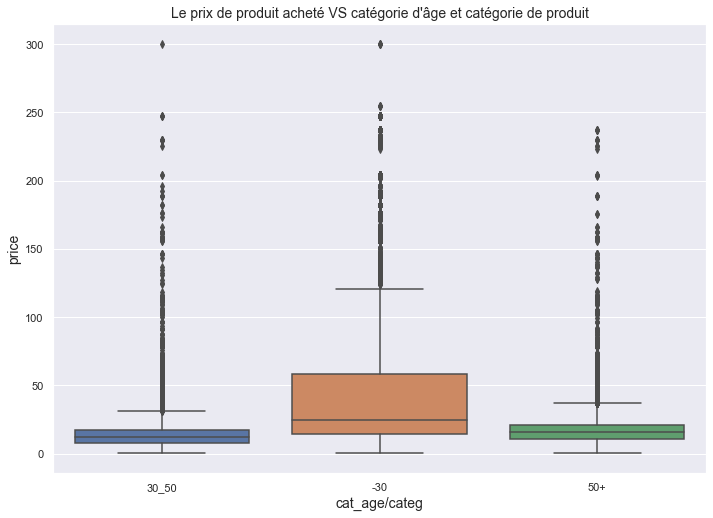

In [87]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data=df, x='new_cat_age', y='price',)

plt.title("Le prix de produit acheté VS catégorie d'âge et catégorie de produit", size=14) 
plt.ylabel("price", size=14)
plt.xlabel("cat_age/categ", size=14)

<AxesSubplot:xlabel='new_cat_age', ylabel='categ'>

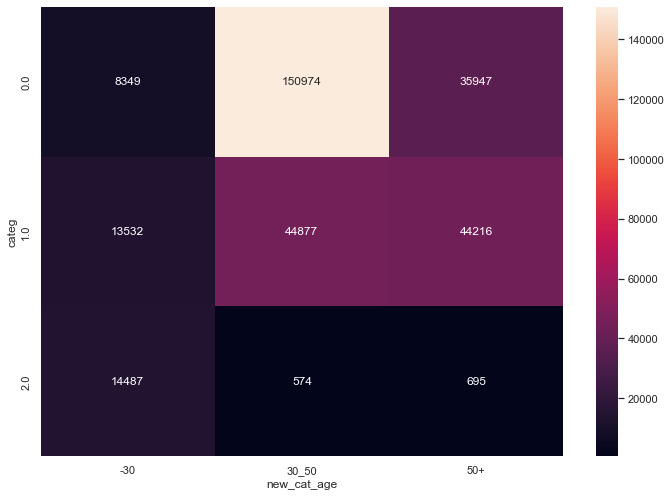

In [88]:
df_newage_cat = pd.crosstab(df.categ, df.new_cat_age)
sns.heatmap(df_newage_cat, annot = True, fmt='g' )

In [89]:
# Calcul eta_2
X = df['new_cat_age']
Y = df['price']

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes =[]
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni':len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})        
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
print('eta-squared:', eta_squared(X,Y))  

eta-squared: 0.2292454077667854


In [90]:
X = "cat_age"
Y = "categ"

df_cont = df[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
df_cont

categ,0.0,1.0,2.0,Total
cat_age,,,,
0_20,2654,4406,4694,11754
20_30,5695,9126,9793,24614
30_40,75212,22273,292,97777
40_50,75762,22604,282,98648
50_60,17521,21663,349,39533
60_70,11631,14228,222,26081
70_80,4755,5754,84,10593
80_100,2040,2571,40,4651
Total,195270,102625,15756,313651


📌Le nombre

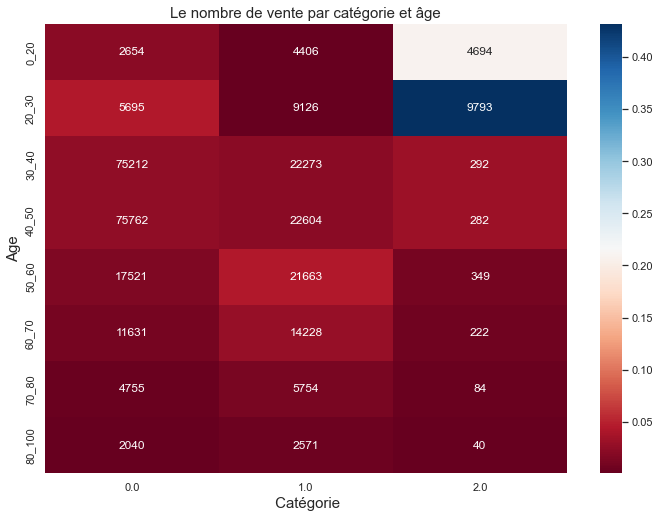

In [91]:
tx = df_cont.loc[:,["Total"]]
ty = df_cont.loc[["Total"],:]
n = len(df)
indep = tx.dot(ty) / n

c = df_cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
h =sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1], fmt='g', cmap = 'RdBu')
plt.xlabel(" Catégorie", size=15)
plt.ylabel('Age', size=15)
plt.title("Le nombre de vente par catégorie et âge", size=15)

plt.show()

In [92]:
df_final_4 = df.pivot_table(index = ['cat_age'], values='price',columns=['categ'] ,  
                            aggfunc = sum).sort_index()

df_final_4

categ,0.0,1.0,2.0
cat_age,,,
0_20,28341.73,90766.43,354661.22
20_30,60751.42,186109.52,733712.87
30_40,802142.16,455131.06,21986.06
40_50,804534.56,462829.89,21541.47
50_60,185977.28,444408.89,25971.39
60_70,123847.47,291750.24,17296.41
70_80,51120.69,117656.75,5466.84
80_100,21878.71,52932.56,2846.35


📌La somme

Text(0.5, 1.0, 'la somme de vente par catégorie et âge')

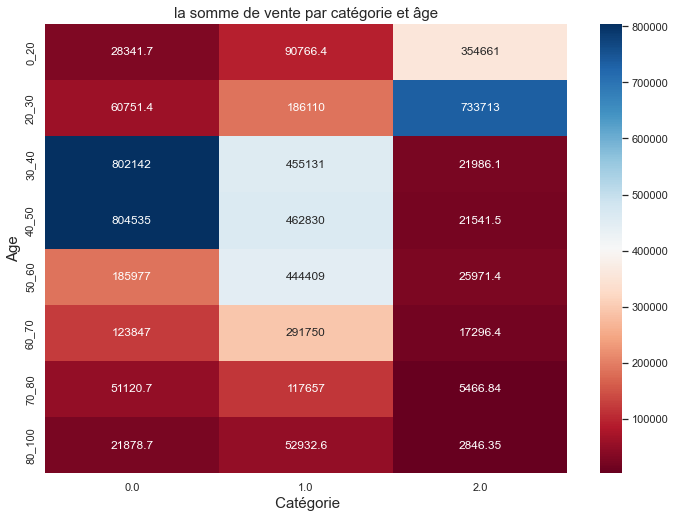

In [93]:
sns.heatmap(df_final_4,  annot = True, fmt='g',cmap = 'RdBu')
plt.xlabel(" Catégorie", size=15)
plt.ylabel('Age', size=15)
plt.title("la somme de vente par catégorie et âge", size=15)

###   <font color = 'green'> 3.2.7 Vendre total par age et sex  </font>

Text(0.5, 1.0, 'Le nombre achetée par par age et sex')

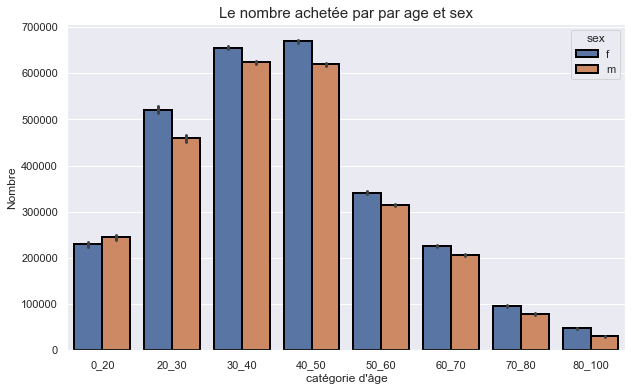

In [94]:
#plt.figure(figsize=(15,5))
#g =sns.displot(x='cat_age', data = df, bins=20, hue='sex')        



sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(10,6)})
g =sns.barplot(x='cat_age', y='price', data=df, hue='sex',
            hue_order=['f','m'],
            errwidth=3,
            edgecolor='black',
            lw=2,  #line width
            estimator=np.sum,
            order=['0_20','20_30','30_40','40_50','50_60','60_70','70_80','80_100']
           )

plt.xlabel("catégorie d'âge")
plt.ylabel('Nombre')
plt.title("Le nombre achetée par par age et sex", size=15)

###   <font color = 'green'> 3.2.8 Vendre total par catégorie et sex  </font>

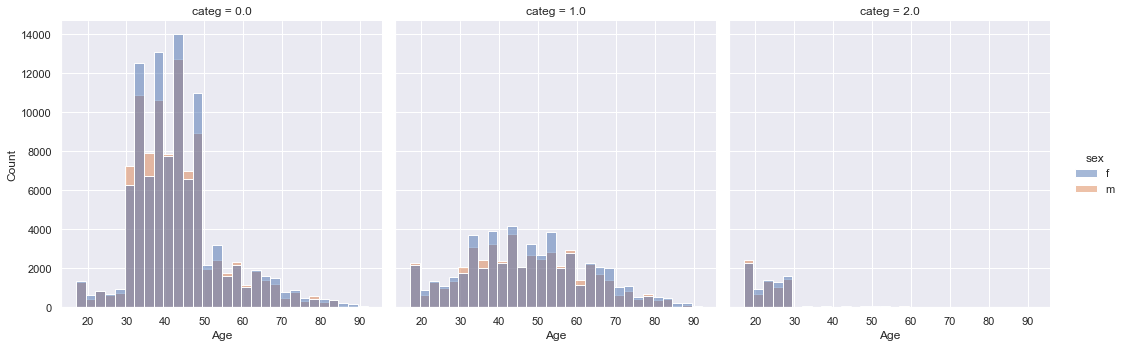

In [95]:
sns.displot(x='Age', data = df, bins=30, hue='sex', col='categ')

###   <font color = 'green'> 3.2.9 Variation des ventes durée de 12 mois  </font>

####  3.2.9.1 par catégorie

📌La somme 

Month

In [96]:
categ_NB_mois = pd.crosstab(df.month, df.categ)
categ_NB_mois

categ,0.0,1.0,2.0
month,,,
1,14395,11748,1248
2,16155,9777,1610
3,16905,8542,1169
4,18035,7061,1343
5,17168,7591,1473
6,14822,8699,1493
7,12691,8569,1793
8,14704,7470,1752
9,21499,8643,789


Text(0.5, 1.0, 'Changement la somme de vente par catégorie et mois')

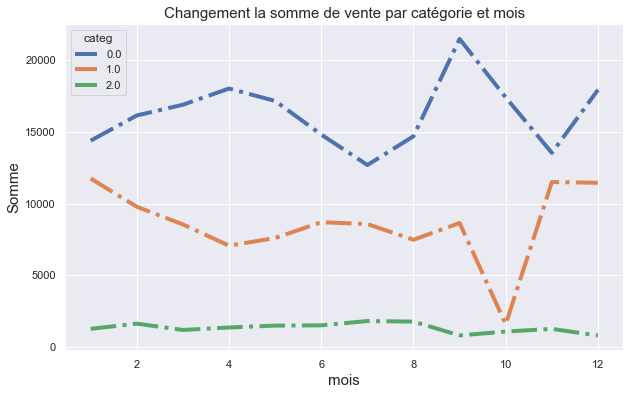

In [97]:
categ_NB_mois = pd.crosstab(df.month, df.categ)
categ_NB_mois.plot(style = '-.', figsize = (10, 6), lw =4)
plt.xlabel("mois", size=15)
plt.ylabel('Somme', size=15)
plt.title("Changement la somme de vente par catégorie et mois", size=15)
#plt.plot(categ_NB)

Week

In [98]:
df_cat_mois_CA = df.pivot_table(index = ['date'], values='price',columns=['categ'], 
                            aggfunc = 'sum').sort_index()
df_cat_mois_CA

categ,0.0,1.0,2.0
date,,,
2021-03-01 00:01:07.843138,11.99,NaN,NaN
2021-03-01 00:02:26.047414,19.37,NaN,NaN
2021-03-01 00:02:38.311413,4.50,NaN,NaN
2021-03-01 00:04:54.559692,6.55,NaN,NaN
2021-03-01 00:05:18.801198,16.49,NaN,NaN
...,...,...,...
2022-02-28 23:56:57.196281,NaN,28.27,NaN
2022-02-28 23:56:57.561424,NaN,13.11,NaN
2022-02-28 23:57:12.741573,8.61,NaN,NaN


Text(0.5, 1.0, 'Changement la somme de vente par catégorie et mois')

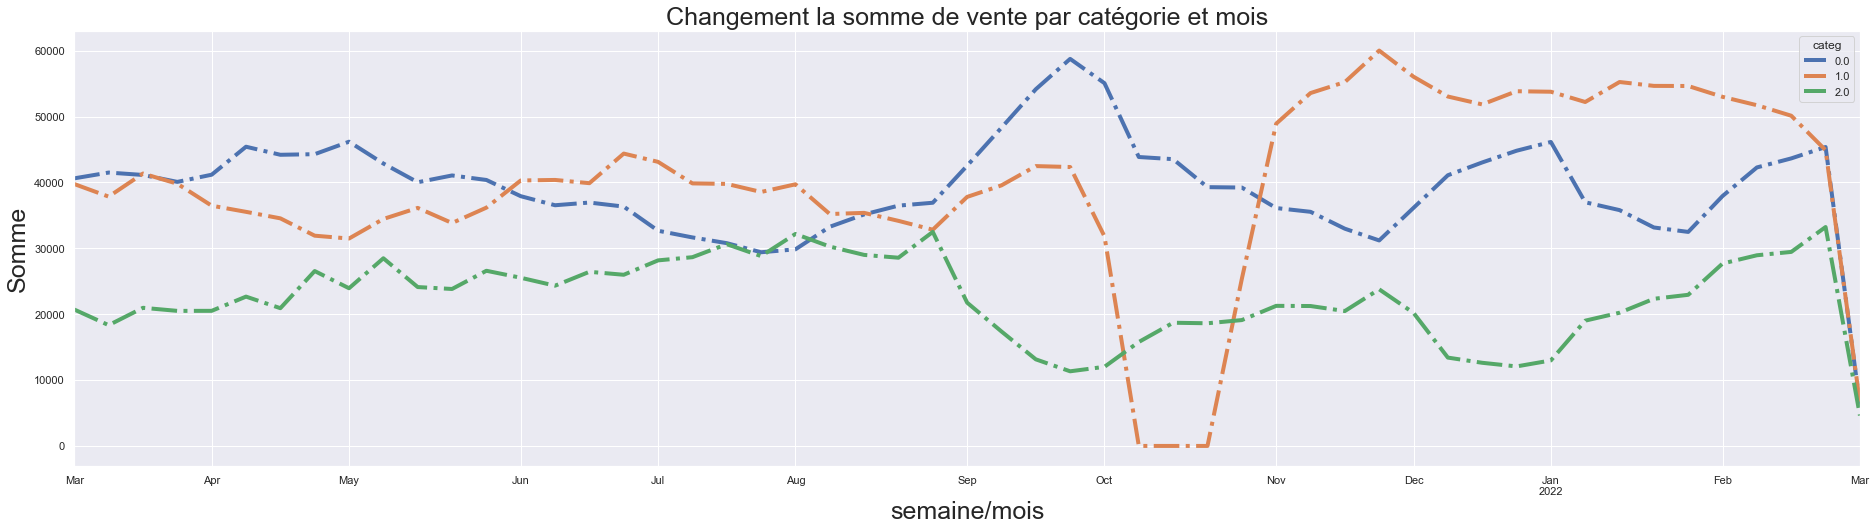

In [99]:
df_cat_mois_CA.resample('W').sum().plot(kind = 'line', style = '-.', figsize = (32, 8), lw =4)
plt.xlabel("semaine/mois", size=25)
plt.ylabel('Somme', size=25)
plt.title("Changement la somme de vente par catégorie et mois", size=25)

📌Le nombre 

In [100]:
df_cat_mois_NB = df.pivot_table(index = ['date'], values='price',columns=['categ'], 
                            aggfunc = 'count').sort_index()
df_cat_mois_NB

categ,0.0,1.0,2.0
date,,,
2021-03-01 00:01:07.843138,1.0,NaN,NaN
2021-03-01 00:02:26.047414,1.0,NaN,NaN
2021-03-01 00:02:38.311413,1.0,NaN,NaN
2021-03-01 00:04:54.559692,1.0,NaN,NaN
2021-03-01 00:05:18.801198,1.0,NaN,NaN
...,...,...,...
2022-02-28 23:56:57.196281,NaN,1.0,NaN
2022-02-28 23:56:57.561424,NaN,1.0,NaN
2022-02-28 23:57:12.741573,1.0,NaN,NaN


Text(0.5, 1.0, 'Changement le nombre de vente par catégorie et mois')

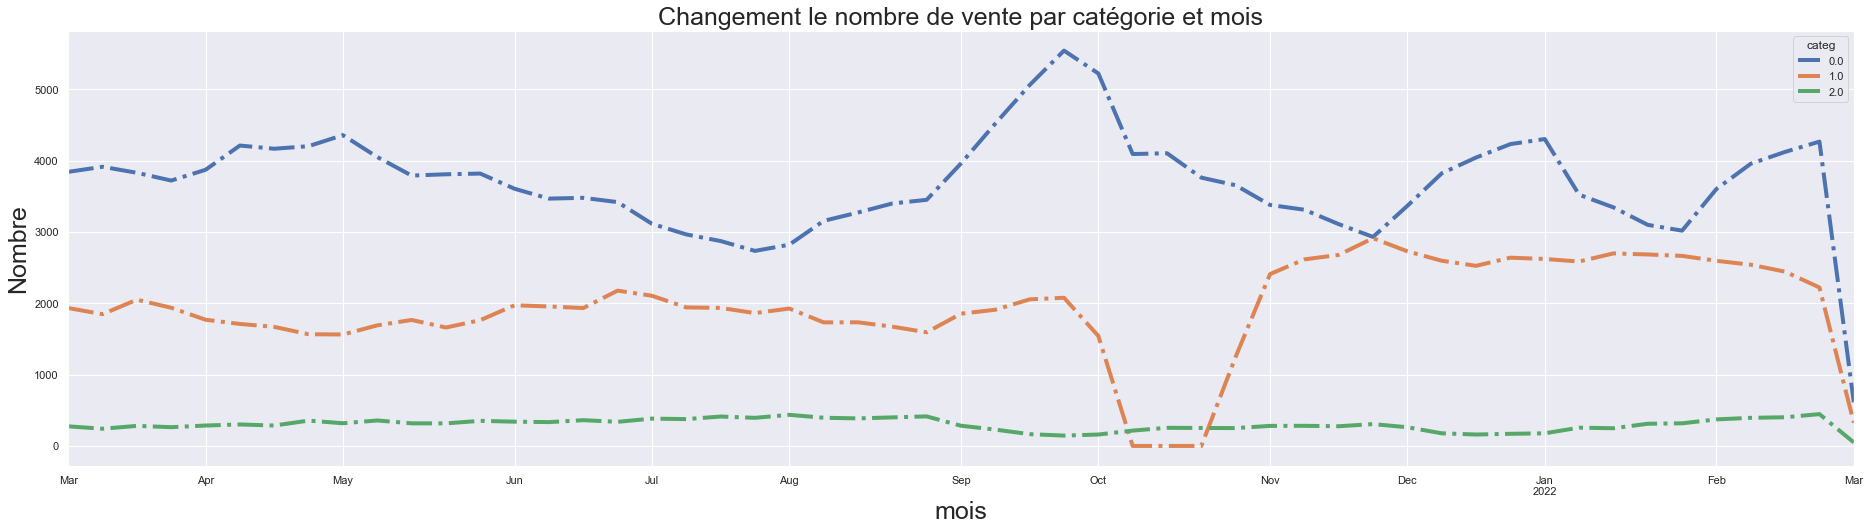

In [101]:
df_cat_mois_NB.resample('w').sum().plot(kind = 'line', style = '-.', figsize = (32, 8), lw =4)
plt.xlabel("mois", size=25)
plt.ylabel('Nombre', size=25)
plt.title("Changement le nombre de vente par catégorie et mois", size=25)

####  3.2.9.2 par age

In [102]:
age_NB = pd.crosstab(df.month, df.cat_age)
age_NB

cat_age,0_20,20_30,30_40,40_50,50_60,60_70,70_80,80_100
month,,,,,,,,
1,1066,2254,8128,8175,3806,2473,1024,465
2,1150,2281,8412,8466,3543,2269,1011,410
3,939,1950,8640,8203,3396,2275,837,376
4,963,1996,8590,8468,3134,2145,778,365
5,1009,2007,8237,8520,3142,2026,905,386
6,1067,2173,7549,7701,3198,2143,829,354
7,1143,2316,6738,6661,2991,2059,790,355
8,1044,2227,7275,7275,3046,1953,759,347
9,851,1686,10054,10681,3667,2523,980,489


Text(0.5, 1.0, 'Changement le nombre de vente par catégorie age et mois')

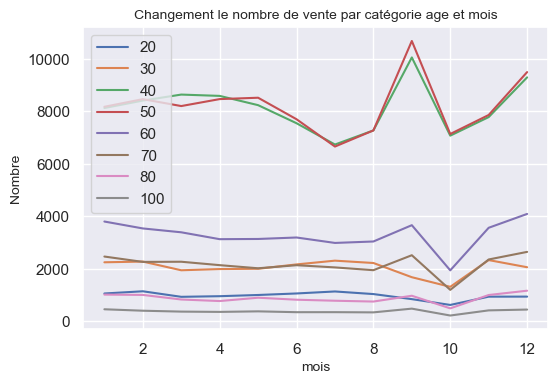

In [103]:
age_NB = pd.crosstab(df.month, df.cat_age)

plt.figure(figsize=(6,4), dpi=100)
plt.plot(age_NB)
plt.legend(['20','30','40','50','60','70','80','100'], loc=2)

plt.xlabel("mois", size=10)
plt.ylabel('Nombre', size=10)
plt.title("Changement le nombre de vente par catégorie age et mois", size=10)

In [104]:
df_age_mois = df.pivot_table(index = ['date'], values='price',columns=['cat_age'],
                            aggfunc = 'sum').sort_index()
df_age_mois

cat_age,0_20,20_30,30_40,40_50,50_60,60_70,70_80,80_100
date,,,,,,,,
2021-03-01 00:01:07.843138,NaN,NaN,NaN,NaN,11.99,NaN,NaN,NaN
2021-03-01 00:02:26.047414,NaN,NaN,NaN,NaN,NaN,19.37,NaN,NaN
2021-03-01 00:02:38.311413,NaN,NaN,4.50,NaN,NaN,NaN,NaN,NaN
2021-03-01 00:04:54.559692,NaN,NaN,6.55,NaN,NaN,NaN,NaN,NaN
2021-03-01 00:05:18.801198,NaN,NaN,NaN,NaN,NaN,16.49,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-02-28 23:56:57.196281,NaN,NaN,28.27,NaN,NaN,NaN,NaN,NaN
2022-02-28 23:56:57.561424,NaN,NaN,13.11,NaN,NaN,NaN,NaN,NaN
2022-02-28 23:57:12.741573,NaN,NaN,8.61,NaN,NaN,NaN,NaN,NaN


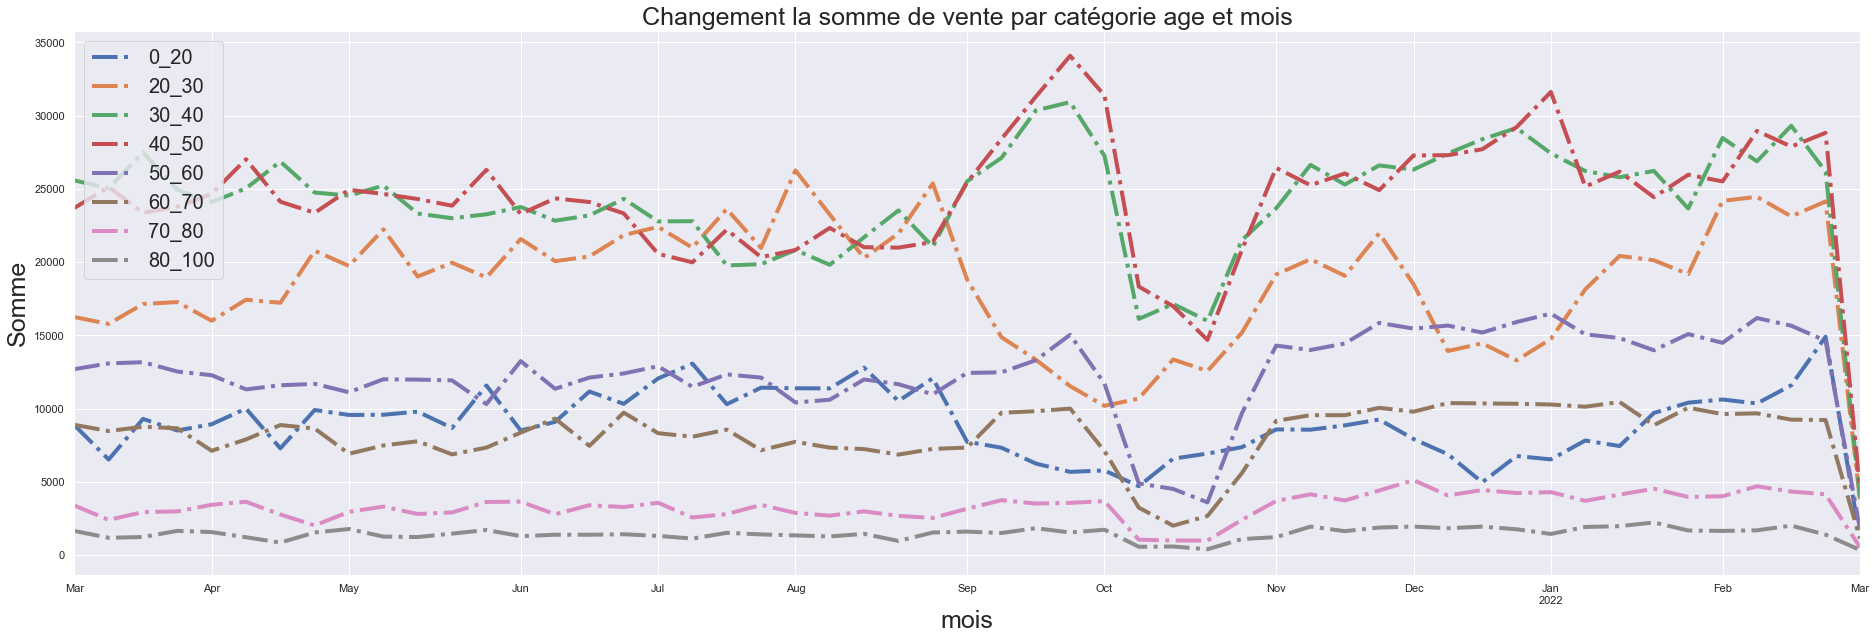

In [105]:
df_age_mois.resample('W').sum().plot(kind = 'line', style = '-.', figsize = (32, 10), lw =4)
plt.xlabel("mois", size=25)
plt.ylabel('Somme', size=25)
plt.title("Changement la somme de vente par catégorie age et mois", size=25)
#plt.legend(loc='best',prop={'size': 25})
#plt.legend(fontsize="x-large") # using a named size
plt.legend(fontsize=20) # using a size in points


# <font color = 'orange'> 4. Statistique  </font>


##  <font color = 'blue'> 4.1 Le test chi-2  </font>

###   <font color = 'green'> 4.1.1 Corrélation entre le sex des clients et les catégories de produits achetés  </font>

mesurer l'indépendance entre deux variables qualitatives à partir du tableau de contigence

In [106]:
df_s_c = pd.crosstab(df.sex, df.categ)
df_s_c

categ,0.0,1.0,2.0
sex,,,
f,101206,53774,8122
m,94064,48851,7634


In [107]:
result_sex_categ = chi2_contingency(df_s_c)
print('statistique de test:',result_sex_categ[0])
print('p_valeur:',result_sex_categ[1])
print('degré de liberté:',result_sex_categ[2])

result_sex_categ = chi2_contingency(df_s_c)

statistique de test: 10.110865513726571
p_valeur: 0.006374607510181767
degré de liberté: 2


###   <font color = 'green'> 4.1.2 Corrélation entre l'âge des clients et La fréquence d’achat (nombre d'achats par mois) </font>


In [108]:
df_catage_moins = pd.crosstab(df.cat_age, df.month) 
df_catage_moins

month,1,2,3,4,5,6,7,8,9,10,11,12
cat_age,,,,,,,,,,,,
0_20,1066,1150,939,963,1009,1067,1143,1044,851,630,945,947
20_30,2254,2281,1950,1996,2007,2173,2316,2227,1686,1320,2338,2066
30_40,8128,8412,8640,8590,8237,7549,6738,7275,10054,7076,7783,9295
40_50,8175,8466,8203,8468,8520,7701,6661,7275,10681,7139,7863,9496
50_60,3806,3543,3396,3134,3142,3198,2991,3046,3667,1947,3568,4095
60_70,2473,2269,2275,2145,2026,2143,2059,1953,2523,1204,2361,2650
70_80,1024,1011,837,778,905,829,790,759,980,500,1008,1172
80_100,465,410,376,365,386,354,355,347,489,227,423,454


In [109]:
result_sex_categ = chi2_contingency(df_catage_moins)
print('statistique de test:',result_sex_categ[0])
print('p_valeur:',result_sex_categ[1])
print('degré de liberté:',result_sex_categ[2])

statistique de test: 2059.6386597962764
p_valeur: 0.0
degré de liberté: 77


###   <font color = 'green'> 4.1.3 Corrélation entre age  des clients et les catégories de produits achetés  </font>

<AxesSubplot:xlabel='categ', ylabel='cat_age'>

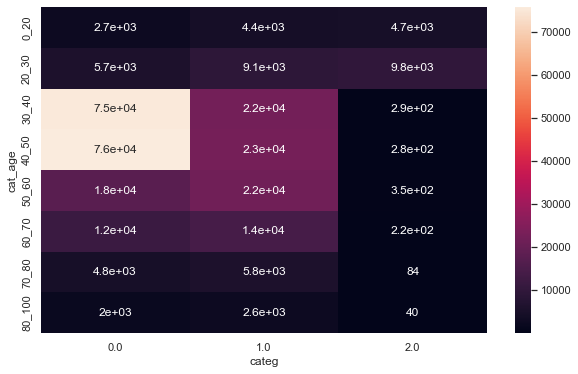

In [110]:
df_age_c = pd.crosstab(df.cat_age, df.categ)
sns.heatmap(df_age_c, annot=True)

In [111]:
result_sex_categ = chi2_contingency(df_age_c)
print('statistique de test:',result_sex_categ[0])
print('p_valeur:',result_sex_categ[1])
print('degré de liberté:',result_sex_categ[2])

statistique de test: 137141.68060792892
p_valeur: 0.0
degré de liberté: 14


##  <font color = 'blue'> 4.2 Le test ANOVA  </font>

###   <font color = 'green'> 4.2.1 Corrélation entre les catégories d'age et les prix  </font>

In [112]:
result_age_vente = smf.ols('price ~ cat_age', data = df).fit()
table_age_vente = sm.stats.anova_lm(result_age_vente)
table_age_vente

,df,sum_sq,mean_sq,F,PR(>F)
cat_age,7.0,2.226079e+07,3.180113e+06,13328.265409,0.0
Residual,313643.0,7.483495e+07,2.385991e+02,NaN,NaN


PR(>F) renseigne la valeur de la p- valeur du test. Celle-ci est inférieure à 5% nous concluons donc que la variable Age a une influence sur price

##  <font color = 'blue'> 4.3 Le test pearson  </font>

###   <font color = 'green'>  Corrélation entre l'âge des clients et le montant total des achats  </font>

In [113]:
pd.DataFrame(pearsonr(df['Age'],df['price']),
            index= ['pearsonr coeff', 'p_valeur'],
            columns=['resultat_test'])

,resultat_test
pearsonr coeff,-0.199018
p_valeur,0.000000


##  <font color = 'blue'> 4.4 One-way ANOVA  </font>

###   <font color = 'green'>  4.4.1 Corrélation entre catégorie de produit   </font>

In [114]:
st.f_oneway(df.price[df['categ'] == 0],
            df.price[df['categ'] == 1],
            df.price[df['categ'] == 2])

F_onewayResult(statistic=281232.0409665302, pvalue=0.0)

###   <font color = 'green'>  4.4.2 Corrélation entre sex   </font>

In [115]:
st.f_oneway(df['price'][df['sex'] == 'm'],
               df['price'][df['sex'] == 'f'])

F_onewayResult(statistic=0.2919304166746223, pvalue=0.5889865050377678)

###   <font color = 'green'>  4.4.3 Corrélation entre catégorie d'age   </font>

In [116]:
st.f_oneway(   df['price'][df['cat_age'] == '0_20'],
               df['price'][df['cat_age'] == '20_30'],
               df['price'][df['cat_age'] == '30_40'],
               df['price'][df['cat_age'] == '40_50'],
               df['price'][df['cat_age'] == '50_60'],
               df['price'][df['cat_age'] == '60_70'],
               df['price'][df['cat_age'] == '70_80'],
               df['price'][df['cat_age'] == '80_100'])

F_onewayResult(statistic=13328.26540890902, pvalue=0.0)

# test

In [117]:
pan_moyenne = df.groupby('Age')['price'].count()

Text(0, 0.5, "Le nombre d'achat")

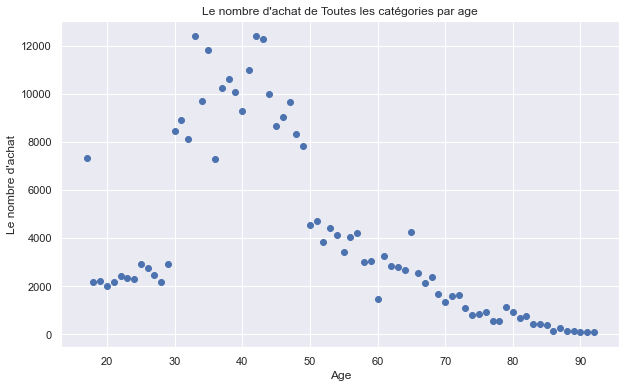

In [118]:
plt.scatter(x = pan_moyenne.index, y = pan_moyenne.values)
plt.title("Le nombre d'achat de Toutes les catégories par age")
plt.xlabel('Age')
plt.ylabel("Le nombre d'achat")

Text(0, 0.5, "Le nombre d'achat")

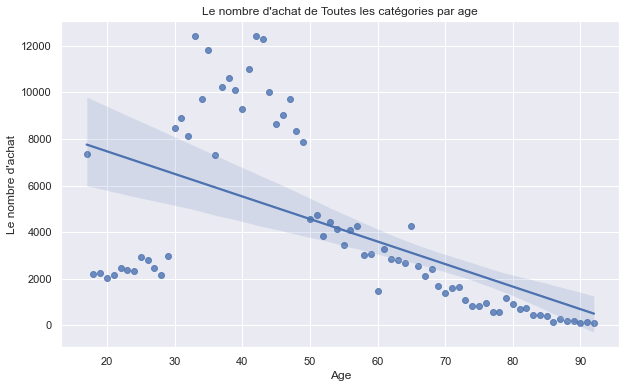

In [119]:
sns.regplot(x = pan_moyenne.index, y = pan_moyenne.values)
plt.title("Le nombre d'achat de Toutes les catégories par age")
plt.xlabel('Age')
plt.ylabel("Le nombre d'achat")

cat/price

In [120]:
pan_moyenne_sum = df.groupby('Age')['price'].sum()

Text(0, 0.5, "La somme d'achat")

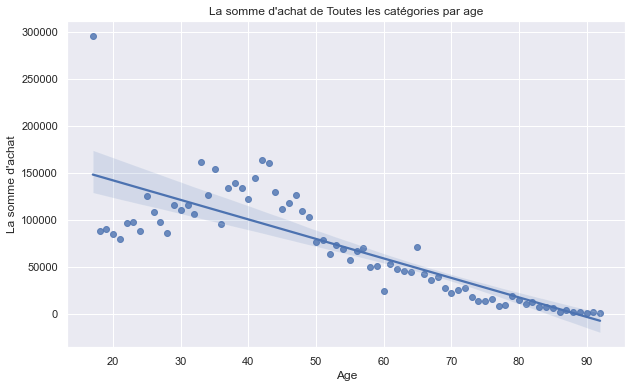

In [121]:
sns.regplot(x = pan_moyenne_sum.index, y = pan_moyenne_sum.values)
plt.title("La somme d'achat de Toutes les catégories par age")
plt.xlabel('Age')
plt.ylabel("La somme d'achat")

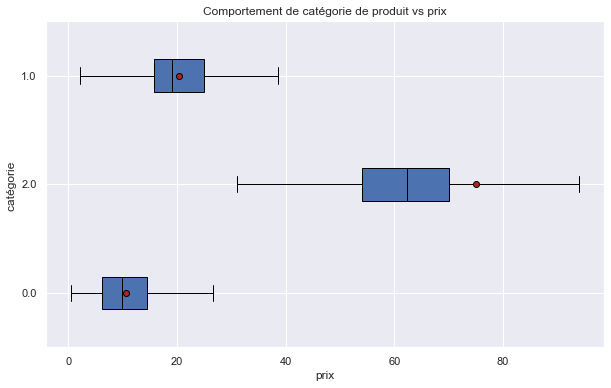

In [122]:
X = "categ" # qualitative
Y = "price" # quantitative

# On ne garde que les dépenses
sous_echantillon = df[df["price"] < 300].copy()
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Comportement de catégorie de produit vs prix")
plt.xlabel('prix')
plt.ylabel("catégorie ")
plt.show()

In [123]:
X = "categ" # qualitative
Y = "price" # quantitative

sous_echantillon = df[df["price"] < 300] # On ne garde que les dépenses

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.6431345411398897

cat/sex

In [124]:
X = "sex"
Y = "categ"

cont = df[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

categ,0.0,1.0,2.0,Total
sex,,,,
f,101206,53774,8122,163102
m,94064,48851,7634,150549
Total,195270,102625,15756,313651


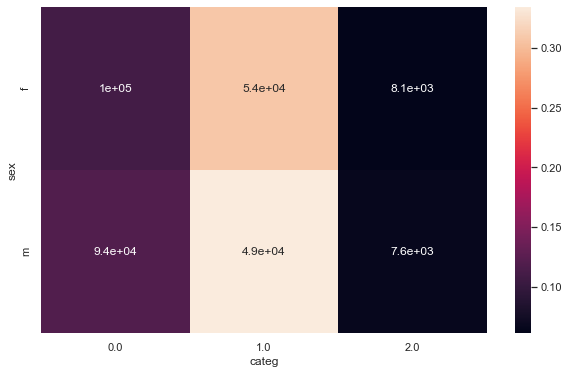

In [125]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(df)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

age/price

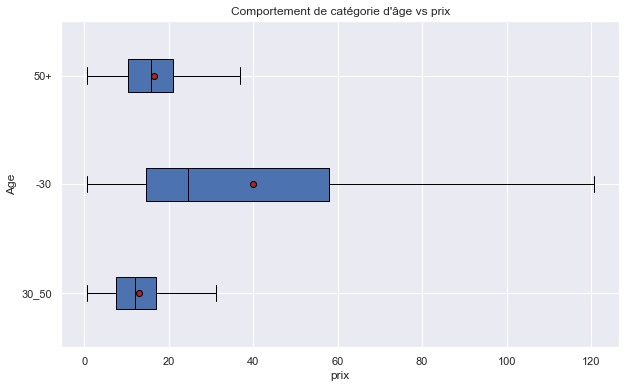

In [126]:
X = "new_cat_age" # qualitative
Y = "price" # quantitative

# On ne garde que les dépenses
sous_echantillon = df[df["price"] < 300].copy()
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Comportement de catégorie d'âge vs prix")
plt.xlabel('prix')
plt.ylabel("Age")
plt.show()

In [127]:
X = "new_cat_age" # qualitative
Y = "price" # quantitative

sous_echantillon = df[df["price"] < 300] # On ne garde que les dépenses

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.22970404181960233

cat_age/categ

In [128]:
X = "cat_age"
Y = "categ"

cont = df[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

categ,0.0,1.0,2.0,Total
cat_age,,,,
0_20,2654,4406,4694,11754
20_30,5695,9126,9793,24614
30_40,75212,22273,292,97777
40_50,75762,22604,282,98648
50_60,17521,21663,349,39533
60_70,11631,14228,222,26081
70_80,4755,5754,84,10593
80_100,2040,2571,40,4651
Total,195270,102625,15756,313651


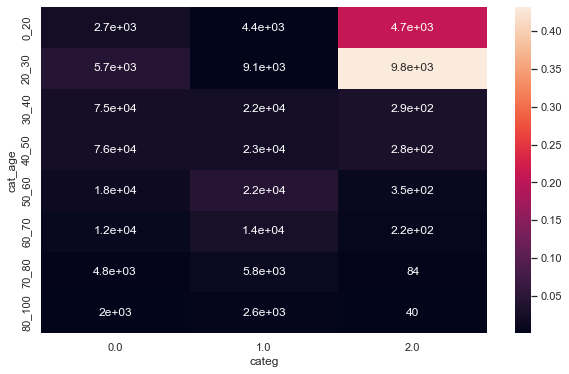

In [129]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(df)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

age/fréquence d’achat

In [130]:
X = "month"
Y = "new_cat_age"

cont = df[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

new_cat_age,-30,30_50,50+,Total
month,,,,
1,3320,16303,7768,27391
2,3431,16878,7233,27542
3,2889,16843,6884,26616
4,2959,17058,6422,26439
5,3016,16757,6459,26232
6,3240,15250,6524,25014
7,3459,13399,6195,23053
8,3271,14550,6105,23926
9,2537,20735,7659,30931


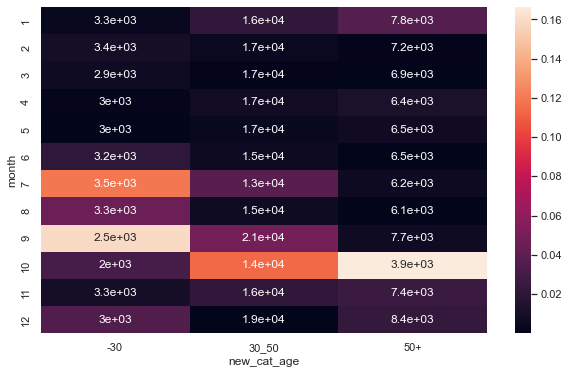

In [131]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(df)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

In [132]:
df_0 = df[df['categ']==0] 

In [133]:
df_0_pan = df_0.groupby('Age')['price'].count()

Text(0, 0.5, "Nombre d'achat")

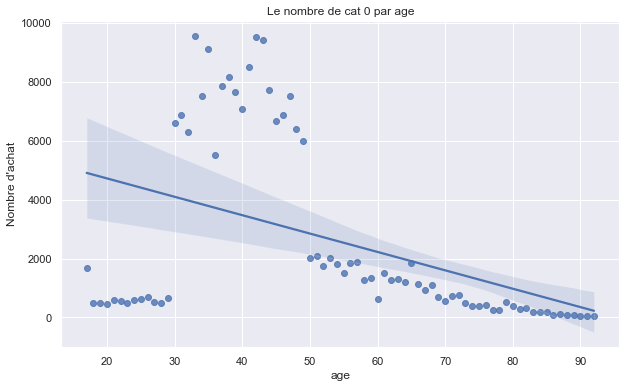

In [134]:
sns.regplot(x = df_0_pan.index, y = df_0_pan.values)
plt.title("Le nombre de cat 0 par age")
plt.xlabel('age')
plt.ylabel("Nombre d'achat")

In [135]:
df_1 = df[df['categ']==1] 


In [136]:
df_1_pan = df_1.groupby('Age')['price'].count()

Text(0, 0.5, "Nombre d'achat")

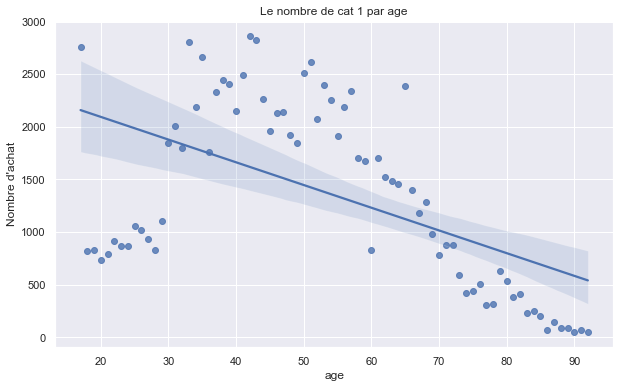

In [137]:
sns.regplot(x = df_1_pan.index, y = df_1_pan.values)
plt.title("Le nombre de cat 1 par age")
plt.xlabel('age')
plt.ylabel("Nombre d'achat")

In [138]:
df_2 = df[df['categ']==2] 

In [139]:
df_2_pan = df_2.groupby('Age')['price'].count()

Text(0, 0.5, "Nombre d'achat")

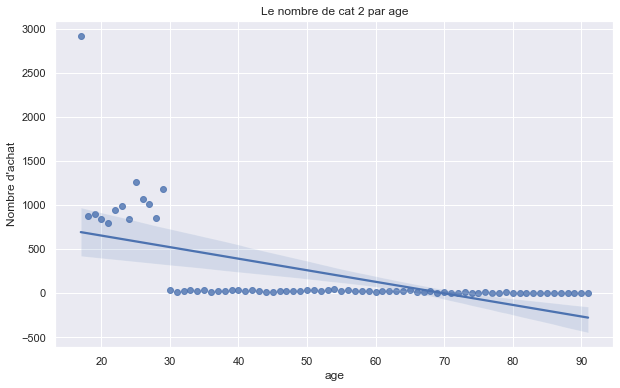

In [140]:
sns.regplot(x = df_2_pan.index, y = df_2_pan.values)
plt.title("Le nombre de cat 2 par age")
plt.xlabel('age')
plt.ylabel("Nombre d'achat")

In [141]:
pan_moyenne_count = df.groupby('cat_age')['price'].count()
pan_moyenne_sum = df.groupby('cat_age')['price'].sum()

pan_moyenne

Age
17    7348
18    2182
19    2224
20    2032
21    2175
      ... 
88     164
89     159
90      84
91     115
92      86
Name: price, Length: 76, dtype: int64

Text(0, 0.5, "Nombre d'achat")

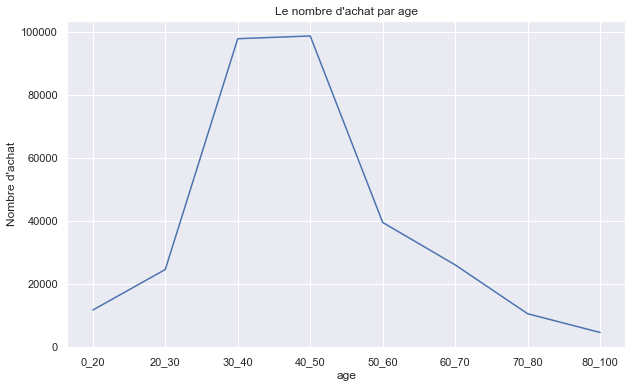

In [142]:
plt.plot(pan_moyenne_count)
plt.title("Le nombre d'achat par age")
plt.xlabel('age')
plt.ylabel("Nombre d'achat")

Text(0, 0.5, "Somme d'achat")

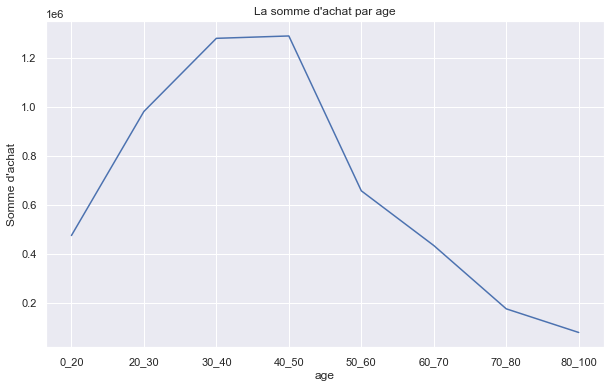

In [143]:
plt.plot(pan_moyenne_sum)
plt.title("La somme d'achat par age")
plt.xlabel('age')
plt.ylabel("Somme d'achat")

La taille du panier moyen  

In [144]:
pan_age = df.groupby(['cat_age','session_id'])['price'].sum()

In [145]:
pan_age.reset_index()

,cat_age,session_id,price
0,0_20,s_100020,35.11
1,0_20,s_100056,68.99
2,0_20,s_100057,67.57
3,0_20,s_100084,12.99
4,0_20,s_100086,50.99
...,...,...,...
157803,80_100,s_99386,10.98
157804,80_100,s_99790,5.99
157805,80_100,s_99806,56.45
157806,80_100,s_99852,14.99


In [146]:
pan_age_des = pan_age.groupby('cat_age').describe()
pan_age_des.reset_index(inplace=True)
pan_age_des

,cat_age,count,mean,std,min,25%,50%,75%,max
0,0_20,6723.0,70.469936,55.323904,2.95,28.99,57.99,88.02,535.17
1,20_30,13884.0,70.626175,55.286039,2.00,29.55,57.99,86.99,539.23
2,30_40,40513.0,31.576513,20.904304,0.62,16.99,27.67,41.26,357.19
3,40_50,40723.0,31.650564,21.040622,0.88,16.99,27.46,41.22,307.73
4,50_60,27578.0,23.800042,20.732955,0.66,11.41,17.99,28.54,339.97
5,60_70,17805.0,24.313065,21.278388,0.62,11.76,18.09,28.99,321.23
6,70_80,7393.0,23.568819,19.697544,0.99,11.43,17.99,28.27,219.49
7,80_100,3189.0,24.351715,20.730748,0.62,11.99,18.11,28.99,259.74


In [147]:
pan_age_mean = pan_age.groupby('cat_age').mean()
pan_age_mean

cat_age
0_20      70.469936
20_30     70.626175
30_40     31.576513
40_50     31.650564
50_60     23.800042
60_70     24.313065
70_80     23.568819
80_100    24.351715
Name: price, dtype: float64

Text(0, 0.5, "Moyenne d'achat")

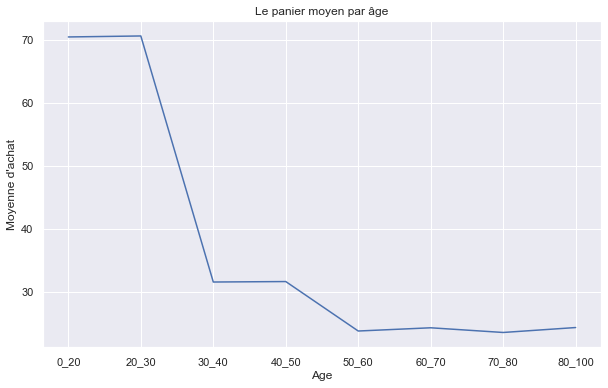

In [148]:
plt.plot(pan_age_mean)
plt.title("Le panier moyen par âge")
plt.xlabel('Age')
plt.ylabel("Moyenne d'achat")